Text Analysis:
===
The aim of this notebook is to illustrate how to create and train a recommendation system to recommend a city to a customer.


The notebook has been divided into two parts: In part I, I have discussed step-by-step process of building an end-2-end pipeline from scratch to build a recommendation system. In part II, Instead of building a pipeline from scratch, I have shown the usage of AutoML framework to create a Recommendation System.

**Note: If you are using Colab, you have to download dataset**

Part I: Step-by-Step process to build a recommendation system
---

#### Data Download:

In [1]:
!wget --header="Host: doc-04-1o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_h2usbqe61t3p2javmc9f8vev3k7aj2re=09663297046543970124|1592236200000|t7e2biv8soplnr65qnqd1b9tqr9hia95; NID=202=LrP4uDlw-tpJIrOsSSVGjEUAYFBvMgE7pYsHllDi2RvAiohnhILxLsaostbt-xc33InPBNV05z_jAtAw4Km239HIJCcIFMoWS8Yh1FmMW-xpd8qowQuNbmhfho6LYG4h7_JheMnumByEDYwFL3O_tCzX30sFKeeVfNE_XxYUTwM" --header="Connection: keep-alive" "https://doc-04-1o-docs.googleusercontent.com/docs/securesc/035r11cge54f61vkg6q5351jddbf1r9g/kt0ltfghjavvbdvik4n6clsphtavub4p/1592236350000/03405636064692215058/09663297046543970124/1sYK1DEsW2uFAtqUzQwTi4O8CIY5KjF9z?e=download&authuser=0" -c -O 'city_ranking.csv'

--2020-06-15 15:53:46--  https://doc-04-1o-docs.googleusercontent.com/docs/securesc/035r11cge54f61vkg6q5351jddbf1r9g/kt0ltfghjavvbdvik4n6clsphtavub4p/1592236350000/03405636064692215058/09663297046543970124/1sYK1DEsW2uFAtqUzQwTi4O8CIY5KjF9z?e=download&authuser=0
Resolving doc-04-1o-docs.googleusercontent.com (doc-04-1o-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-04-1o-docs.googleusercontent.com (doc-04-1o-docs.googleusercontent.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10254 (10K) [text/csv]
Saving to: ‘city_ranking.csv’

city_ranking.csv    100%[===================>]  10.01K  --.-KB/s    in 0s      

2020-06-15 15:53:46 (93.3 MB/s) - ‘city_ranking.csv’ saved [10254/10254]



In [2]:
!ls

city_ranking.csv  sample_data


### Exploratory Data Analysis:

In [3]:
import pandas as pd

city_ranking = pd.read_csv('city_ranking.csv')
city_ranking.head()

city         country  ...  Festival Ranking  Total
0     Berlin         Germany  ...               8.0   7.14
1   Montréal          Canada  ...               9.0   7.10
2     London  United Kingdom  ...               7.5   6.71
3  Amsterdam     Netherlands  ...               9.7   6.63
4    Toronto          Canada  ...               9.4   6.60

[5 rows x 20 columns]

In [4]:
# how many of them are numerical and text
print(city_ranking.info())
# 2 categorical
# 18 numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           110 non-null    object 
 1   country                        110 non-null    object 
 2   Employment Score               110 non-null    float64
 3   Startup Score                  110 non-null    float64
 4   Tourism Score                  110 non-null    float64
 5   Housing Score                  110 non-null    float64
 6   Food Ranking                   110 non-null    float64
 7   Transport Score                110 non-null    float64
 8   Health Rank                    110 non-null    float64
 9   Internet Speed Score           110 non-null    float64
 10  University Score               110 non-null    float64
 11  Access to Contraceptive Score  110 non-null    float64
 12  Gender Equality Score          110 non-null    flo

In [5]:
# check if there are null values
pd.isnull(city_ranking).sum()

city                             0
country                          0
Employment Score                 0
Startup Score                    0
Tourism Score                    0
Housing Score                    0
Food Ranking                     0
Transport Score                  0
Health Rank                      0
Internet Speed Score             0
University Score                 0
Access to Contraceptive Score    0
Gender Equality Score            0
Immigration Tolerence            0
Personal Freedom and Choice      0
LGBT friendly Score              0
Nightlife Score                  0
Beer Ranking                     0
Festival Ranking                 0
Total                            0
dtype: int64

#### Univariate Analysis:

In [6]:
# number of cities we have in the dataset are unique
print(city_ranking['city'].nunique())
# all cities are unique

110


In [7]:
# number of countries we have in the dataset are unique
print(city_ranking['country'].nunique())
# only 42 countries are unique

42


**Distribution of Total Score**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


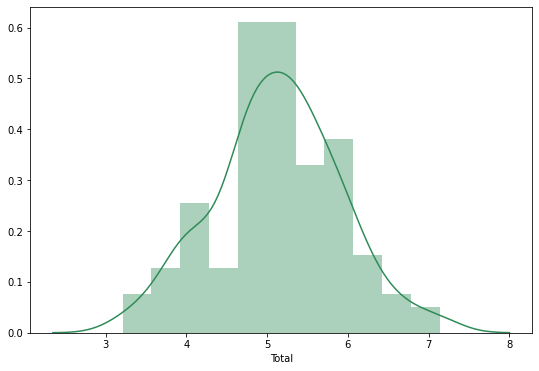

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.distplot(city_ranking['Total'], color="seagreen");

**Distribution of Immigration Tolerence**

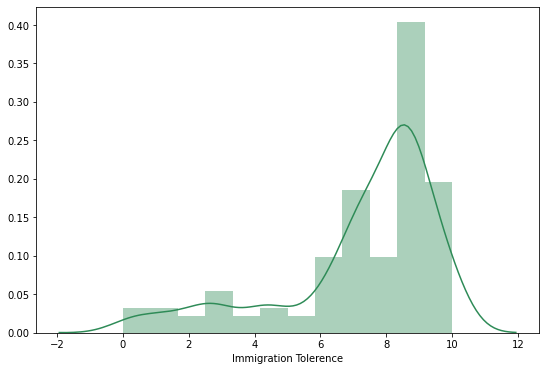

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.distplot(city_ranking['Immigration Tolerence'], color="seagreen");

**Distribution of Gender Equality Score**

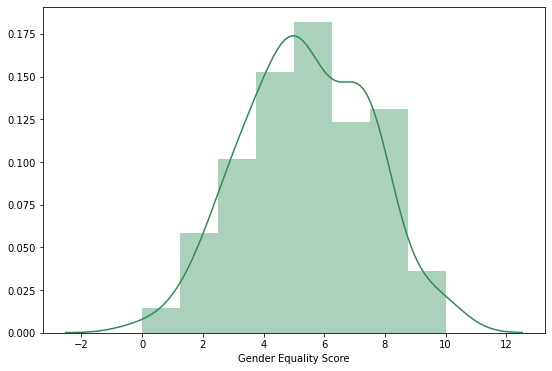

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.distplot(city_ranking['Gender Equality Score'], color="seagreen");

**Distribution of Transport Score**

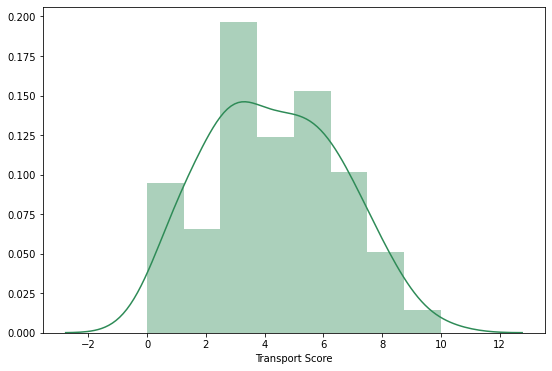

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.distplot(city_ranking['Transport Score'], color="seagreen");

**Distribution of Access to Contraceptive Score**

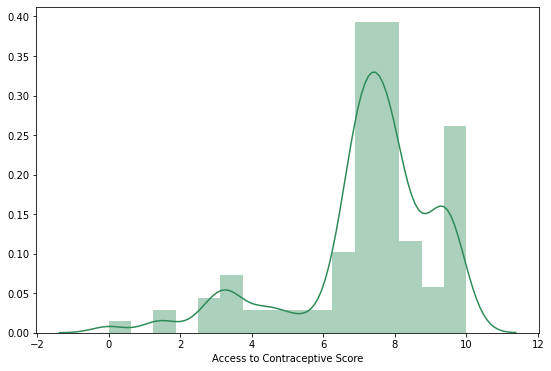

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.distplot(city_ranking['Access to Contraceptive Score'], color="seagreen");

**Relation between feature values and index**

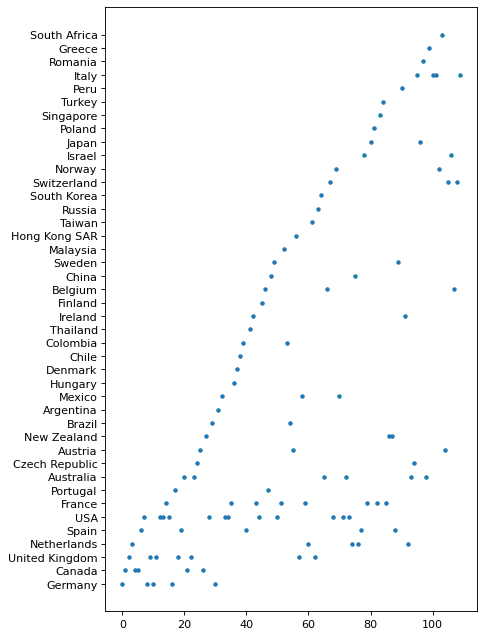

In [13]:
import matplotlib.pyplot as plt

#X-axis : row index, y-axis : country feature values
plt.figure(num=None, figsize=(6, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(city_ranking['country'], '.');

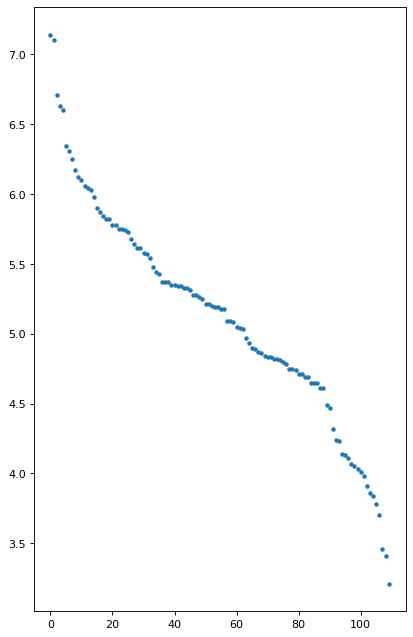

In [14]:
import matplotlib.pyplot as plt

#X-axis : row index, y-axis : Total feature values
plt.figure(num=None, figsize=(6, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(city_ranking['Total'], '.');

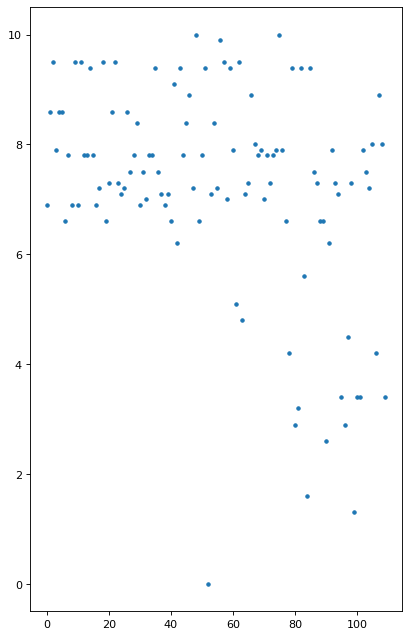

In [15]:
import matplotlib.pyplot as plt

#X-axis : row index, y-axis : Access to Contraceptive Score feature values
plt.figure(num=None, figsize=(6, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(city_ranking['Access to Contraceptive Score'], '.');

**Let's see range of values for every score and ranking**

In [16]:
for col in city_ranking.columns:
  if city_ranking[col].dtype == 'float64':
    print("Range of", col, "is", city_ranking[col].min(), "to", city_ranking[col].max())

Range of Employment Score is 0.0 to 10.0
Range of Startup Score is 0.0 to 10.0
Range of Tourism Score is 0.0 to 10.0
Range of Housing Score is 0.0 to 10.0
Range of Food Ranking is 0.0 to 10.0
Range of Transport Score is 0.0 to 10.0
Range of Health Rank is 0.0 to 10.0
Range of Internet Speed Score is 0.0 to 10.0
Range of University Score is 1.0 to 10.0
Range of Access to Contraceptive Score is 0.0 to 10.0
Range of Gender Equality Score is 0.0 to 10.0
Range of Immigration Tolerence is 0.0 to 10.0
Range of Personal Freedom and Choice is 0.0 to 10.0
Range of LGBT friendly Score is 0.0 to 10.0
Range of Nightlife Score is 0.0 to 10.0
Range of Beer Ranking is 0.0 to 10.0
Range of Festival Ranking is 0.0 to 10.0
Range of Total is 3.21 to 7.14


*All 16 columns values lie in 0 to 10.0 except University Score and Total*

#### Bivariate Analysis:

In [17]:
for col in city_ranking.columns:
  if city_ranking[col].dtype == 'float64':
    print(city_ranking['city'][city_ranking[[col]].idxmax()].values[0], "has the highest", col)

Beijing has the highest Employment Score
New York City has the highest Startup Score
Hong Kong has the highest Tourism Score
Guadalajara has the highest Housing Score
Bangkok has the highest Food Ranking
Oslo has the highest Transport Score
Tokyo has the highest Health Rank
Seoul has the highest Internet Speed Score
London has the highest University Score
Beijing has the highest Access to Contraceptive Score
Oslo has the highest Gender Equality Score
Auckland has the highest Immigration Tolerence
Amsterdam has the highest Personal Freedom and Choice
Madrid has the highest LGBT friendly Score
Berlin has the highest Nightlife Score
Beijing has the highest Beer Ranking
Miami has the highest Festival Ranking
Berlin has the highest Total


*Every city has unique personality for people, if you want to get your kids best education in the world London has the highest University score whereas Auckland has the highest Immigration Tolerance score*

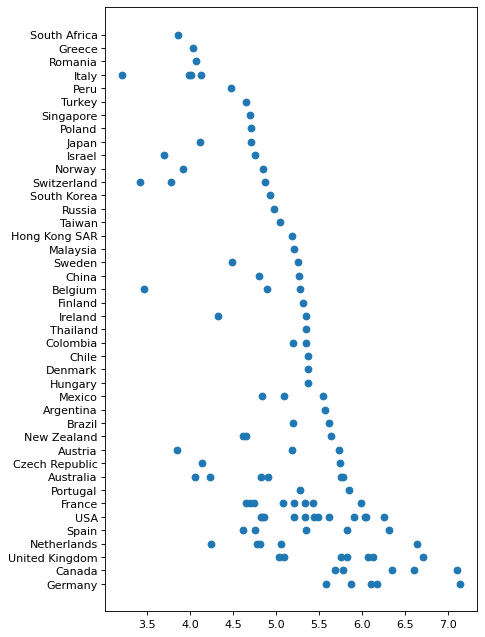

In [18]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(6, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(city_ranking['Total'], city_ranking['country']);

#### Feature Groups:

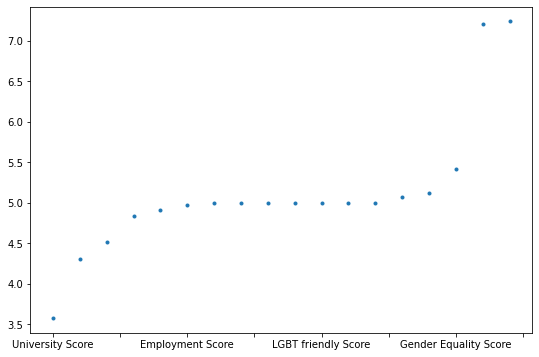

In [19]:
# sort features by their mean values
plt.figure(figsize=(9,6))
city_ranking.mean().sort_values().plot(style='.');

In [20]:
# let's take a deeper look at mean values
city_ranking.mean().sort_values()

University Score                 3.580000
Transport Score                  4.304545
Festival Ranking                 4.517273
Health Rank                      4.841818
Personal Freedom and Choice      4.914545
Employment Score                 4.972727
Internet Speed Score             4.992727
Nightlife Score                  4.992727
Startup Score                    4.994545
Tourism Score                    5.000000
LGBT friendly Score              5.000000
Housing Score                    5.000909
Food Ranking                     5.000909
Beer Ranking                     5.067273
Total                            5.125545
Gender Equality Score            5.416364
Access to Contraceptive Score    7.210909
Immigration Tolerence            7.236364
dtype: float64

*We can create new features by combining Access to Contraceptive Score and Immigration Tolerence*

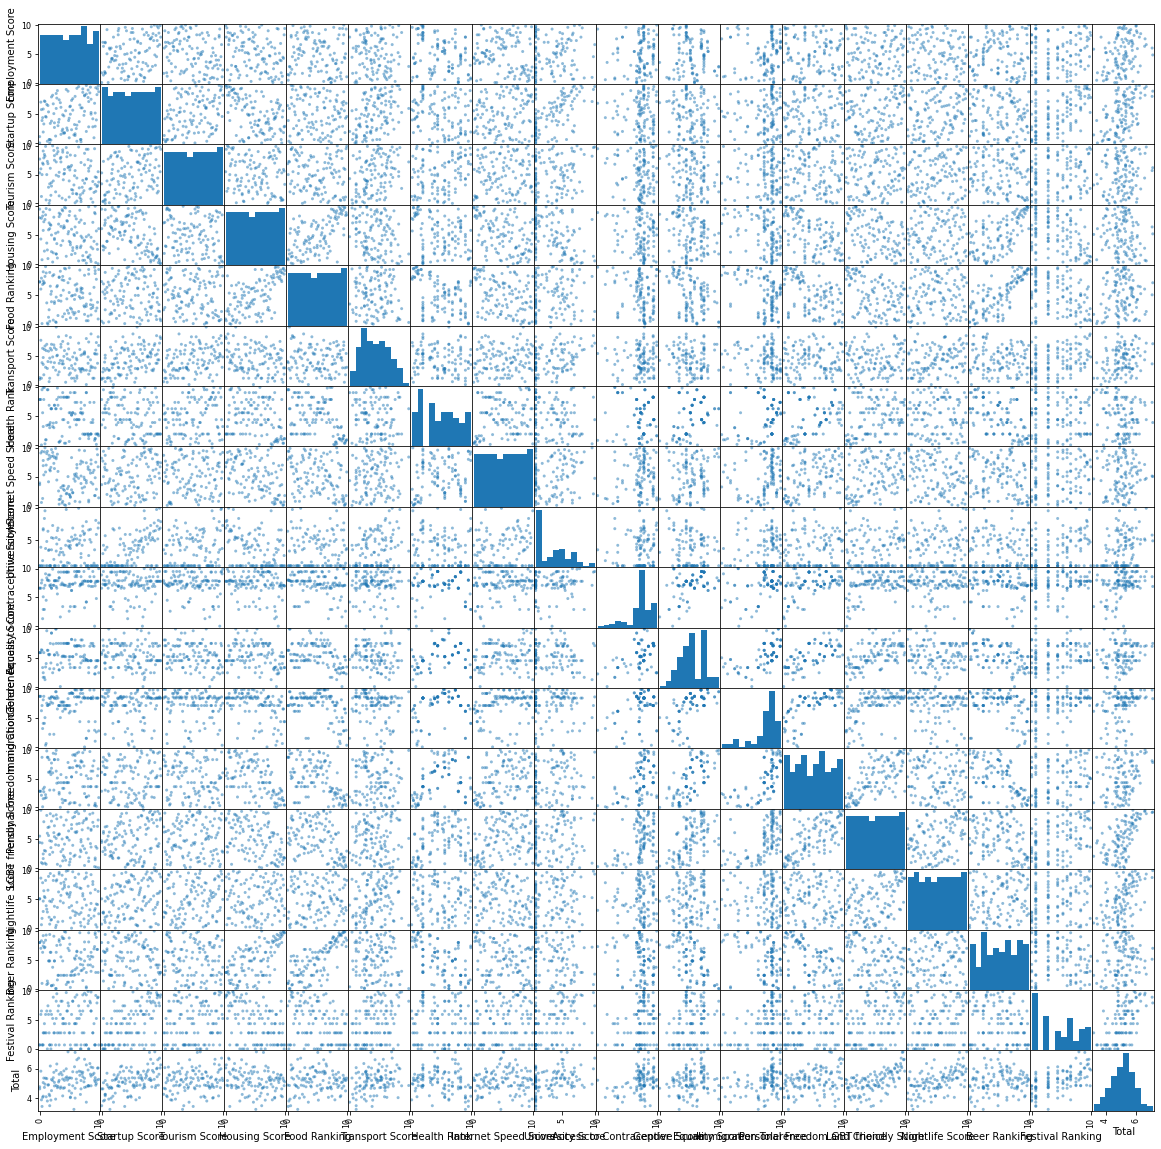

In [21]:
# to look at all the plots at once:
pd.plotting.scatter_matrix(city_ranking, figsize=(20, 20));

### Modeling:

**Let's try to build a tree based model and plot it to see how it distinguishes between different features**

In [22]:
from sklearn.tree import DecisionTreeClassifier

train = city_ranking.drop('city', axis=1).copy()
# Create a copy to work with
X = train.copy()
# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

Y = city_ranking['city'].values
clf = DecisionTreeClassifier(random_state=17)
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

### Visualization:

In [0]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [0]:
tree_graph_to_png(tree=clf, feature_names=X.columns, 
                  png_file_to_save='decision_tree1.png')

In [25]:
import IPython.display as display

display.display(display.Image(filename='decision_tree1.png'))

Part 2: Using AutoML framework - Uber Ludwig
---
Ludwig is a toolbox built on top of TensorFlow that allows to train and test deep learning models without the need to write code.

All you need to provide is a CSV file containing your data, a list of columns to use as inputs, and a list of columns to use as outputs, in the form of yaml file; Ludwig will do the rest. Simple commands can be used to train models both locally and in a distributed way, and to use them to predict on new data.

### Download the dataset

In [0]:
!wget --header="Host: doc-04-1o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_h2usbqe61t3p2javmc9f8vev3k7aj2re=09663297046543970124|1592142450000|57ju8bfguunice1h5r8hn3qrgn0seq0k; NID=202=LrP4uDlw-tpJIrOsSSVGjEUAYFBvMgE7pYsHllDi2RvAiohnhILxLsaostbt-xc33InPBNV05z_jAtAw4Km239HIJCcIFMoWS8Yh1FmMW-xpd8qowQuNbmhfho6LYG4h7_JheMnumByEDYwFL3O_tCzX30sFKeeVfNE_XxYUTwM" --header="Connection: keep-alive" "https://doc-04-1o-docs.googleusercontent.com/docs/securesc/035r11cge54f61vkg6q5351jddbf1r9g/sckq6f0pmdsf354e004g32v32frmh1p6/1592142450000/03405636064692215058/09663297046543970124/1sYK1DEsW2uFAtqUzQwTi4O8CIY5KjF9z?e=download&authuser=0" -c -O 'city_ranking.csv'

--2020-06-14 13:51:14--  https://doc-04-1o-docs.googleusercontent.com/docs/securesc/035r11cge54f61vkg6q5351jddbf1r9g/sckq6f0pmdsf354e004g32v32frmh1p6/1592142450000/03405636064692215058/09663297046543970124/1sYK1DEsW2uFAtqUzQwTi4O8CIY5KjF9z?e=download&authuser=0
Resolving doc-04-1o-docs.googleusercontent.com (doc-04-1o-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to doc-04-1o-docs.googleusercontent.com (doc-04-1o-docs.googleusercontent.com)|74.125.28.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10254 (10K) [text/csv]
Saving to: ‘city_ranking.csv’

city_ranking.csv    100%[===================>]  10.01K  --.-KB/s    in 0s      

2020-06-14 13:51:14 (69.1 MB/s) - ‘city_ranking.csv’ saved [10254/10254]



In [26]:
!ls

city_ranking.csv  decision_tree1.png  sample_data


### Pre-process the dataset

In [27]:
import pandas as pd

city_ranking = pd.read_csv('city_ranking.csv')
city_ranking.head()

city         country  ...  Festival Ranking  Total
0     Berlin         Germany  ...               8.0   7.14
1   Montréal          Canada  ...               9.0   7.10
2     London  United Kingdom  ...               7.5   6.71
3  Amsterdam     Netherlands  ...               9.7   6.63
4    Toronto          Canada  ...               9.4   6.60

[5 rows x 20 columns]

In [28]:
city_ranking.columns

Index(['city', 'country', 'Employment Score', 'Startup Score', 'Tourism Score',
       'Housing Score', 'Food Ranking', 'Transport Score', 'Health Rank',
       'Internet Speed Score', 'University Score',
       'Access to Contraceptive Score', 'Gender Equality Score',
       'Immigration Tolerence', 'Personal Freedom and Choice',
       'LGBT friendly Score', 'Nightlife Score', 'Beer Ranking',
       'Festival Ranking', 'Total'],
      dtype='object')

In [29]:
city_ranking.columns = ['city', 'country', 'Employment_Score', 'Startup_Score', 'Tourism_Score',
       'Housing_Score', 'Food_Ranking', 'Transport_Score', 'Health_Rank',
       'Internet_Speed_Score', 'University_Score',
       'Access_to_Contraceptive_Score', 'Gender_Equality_Score',
       'Immigration_Tolerence', 'Personal_Freedom_and_Choice',
       'LGBT_friendly_Score', 'Nightlife_Score', 'Beer_Ranking',
       'Festival_Ranking', 'Total']
city_ranking.head()

city         country  ...  Festival_Ranking  Total
0     Berlin         Germany  ...               8.0   7.14
1   Montréal          Canada  ...               9.0   7.10
2     London  United Kingdom  ...               7.5   6.71
3  Amsterdam     Netherlands  ...               9.7   6.63
4    Toronto          Canada  ...               9.4   6.60

[5 rows x 20 columns]

In [0]:
city_ranking.to_csv('city_rank.csv', index=None)

### Clone the repository

In [31]:
!git clone https://github.com/uber/ludwig.git

Cloning into 'ludwig'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 10371 (delta 210), reused 172 (delta 104), pack-reused 10050
Receiving objects: 100% (10371/10371), 13.63 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (7470/7470), done.


### Change requirements.txt to train on GPU

In [32]:
%%writefile ludwig/requirements.txt
Cython>=0.25
h5py>=2.6
numpy>=1.15
pandas>=0.19
scipy>=0.18
tabulate>=0.7
scikit-learn
tqdm
tensorflow-gpu==1.15.2
PyYAML>=3.12
absl-py

Overwriting ludwig/requirements.txt


### Install the library using bash commands

In [33]:
%%bash
cd ludwig
pip install -r requirements.txt
python setup.py install

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=bc29428bcfdfb6ec1544b9c4c11ae48b473c1b3834ee69bec4d1c5362bab5121
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
running install
running bdist_egg
running egg_info
creating ludwig.egg-info
writing ludwig.egg-info/PKG-INFO
writing dependency_links to ludwig.egg-info/dependency_links.txt
writing entry points to ludwig.egg-info/entry_points.txt
writing requirements to ludwig.egg-info/requires.txt
writing top-level names to ludw

ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
zip_safe flag not set; analyzing archive contents...
ludwig.utils.__pycache__.neuropod_utils.cpython-36: module references __file__


### Create model_definition_file.yaml specifying column name and model architecture with attention mechansim

In [34]:
%%writefile model_definition_file.yaml
input_features:
    -
        name: country
        type: category
    -
        name: Employment_Score
        type: numerical
    -
        name: Startup_Score
        type: numerical
    -
        name: Tourism_Score
        type: numerical
    -
        name: Housing_Score
        type: numerical
    -
        name: Food_Ranking
        type: numerical
    -
        name: Transport_Score
        type: numerical
    -
        name: Health_Rank
        type: numerical
    -
        name: Internet_Speed_Score
        type: numerical
    -
        name: University_Score
        type: numerical
    -
        name: Access_to_Contraceptive_Score
        type: numerical
    -
        name: Gender_Equality_Score
        type: numerical
    -
        name: Immigration_Tolerence
        type: numerical
    -
        name: Personal_Freedom_and_Choice
        type: numerical
    -
        name: LGBT_friendly_Score
        type: numerical
    -
        name: Beer_Ranking
        type: numerical
    -
        name: Festival_Ranking
        type: numerical
    -
        name: Total
        type: numerical

output_features:
    -
        name: city
        type: category

Writing model_definition_file.yaml


### Check GPU is available

In [35]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Train the model

In [36]:
!ludwig experiment \
  --data_csv city_rank.csv \
  --model_definition_file model_definition_file.yaml

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2.2.7 - Experiment

Experiment name: experiment
Model name: run
Output path: results/experiment_run


ludwig_version: '0.2.2.7'
command: ('/usr/local/bin/ludwig experiment --data_csv city_rank.csv '
 '--model_definition_file model_definition_file.yaml')
random_seed: 42
input_data: 'city_rank.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'name': 'country',
                              'tied_weights': None,
     

### Predicting, specify model path and csv file

In [37]:
!ludwig predict --data_csv city_rank.csv --model_path results/experiment_run/model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2.2.7 - Predict

Dataset path: city_rank.csv
Model path: results/experiment_run/model

Found hdf5 with the same filename of the csv, using it instead
Loading metadata from: results/experiment_run/model/train_set_metadata.json
Loading data from: city_rank.hdf5

╒═══════════════╕
│ LOADING MODEL │
╘═══════════════╛

  embedding_size (50) is greater than vocab_size (43). Setting embedding size to be equal to vocab_size.
2020-06-15 15:56:52.190130: I tensorf